In [34]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [74]:
regexp = "a+.*ge"
text = "aasefecge"

In [75]:
def match(s, p):
    DP = np.zeros((21, 31), dtype=bool)
    s_len = len(s)
    p_len = len(p)
    DP[s_len, p_len] = True
    for i in range(s_len, -1, -1):
        for j in range(p_len - 1, -1, -1):
            match = ((i < s_len) and (p[j] == '.' or p[j] == s[i]))
            if (j+1 < p_len) and (p[j+1] == '*'):
                DP[i, j] = DP[i, j+2] or (DP[i+1, j] and match) or (DP[i+1, j+2] and match)
            elif (j+1 < p_len) and (p[j+1] == '+'):
                DP[i, j] = (DP[i+1, j] and match) or (DP[i+1, j+2] and match)
            else:
                DP[i, j] = DP[i+1, j+1] and match;

    return DP[:s_len, :p_len]
    
match(text, regexp)

array([[ True, False,  True, False, False, False],
       [ True, False,  True, False, False, False],
       [False, False,  True, False, False, False],
       [False, False,  True, False, False, False],
       [False, False,  True, False, False, False],
       [False, False,  True, False, False, False],
       [False, False,  True, False, False, False],
       [False, False,  True, False,  True, False],
       [False, False, False, False, False,  True]])

<AxesSubplot:>

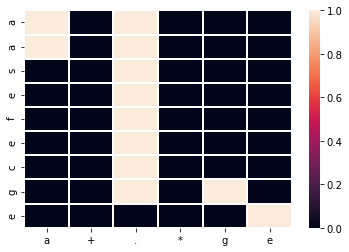

In [76]:
sns.heatmap(match(text, regexp).astype(int), xticklabels=list(regexp), yticklabels=list(text), linewidths=0.1)